In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

games_info = pd.read_csv('game_Details.csv')
games_info.head(100)

,gameName,releaseTime,price,titleURL,applyId
0,Back 4 Blood,"12 Oct, 2021",S$69.90S$48.93,https://store.steampowered.com/app/924970/Back...,924970
1,FIFA 22,"30 Sep, 2021",S$69.90S$41.94,https://store.steampowered.com/app/1506830/FIF...,1506830
2,FIFA 22,"30 Sep, 2021",S$69.90S$41.94,https://store.steampowered.com/app/1506830/FIF...,1506830
3,Battlefield™ 2042,"19 Nov, 2021",S$69.90,https://store.steampowered.com/app/1517290/Bat...,1517290
4,DEATH STRANDING,"14 Jul, 2020",S$79.90S$23.97,https://store.steampowered.com/sub/489555/?snr...,489555
5,Halo Infinite (Campaign),"Dec, 8 2021",S$79.90,https://store.steampowered.com/app/1708091/Hal...,1708091
6,Football Manager 2022,"8 Nov, 2021",S$59.00,https://store.steampowered.com/app/1569040/Foo...,1569040
7,Forza Horizon 5,"8 Nov, 2021",S$79.90,https://store.steampowered.com/app/1551360/For...,1551360
8,Back 4 Blood,"12 Oct, 2021",S$69.90S$48.93,https://store.steampowered.com/app/924970/Back...,924970
9,Myth of Empires,"18 Nov, 2021",S$26.00S$23.40,https://store.steampowered.com/app/1371580/Myt...,1371580


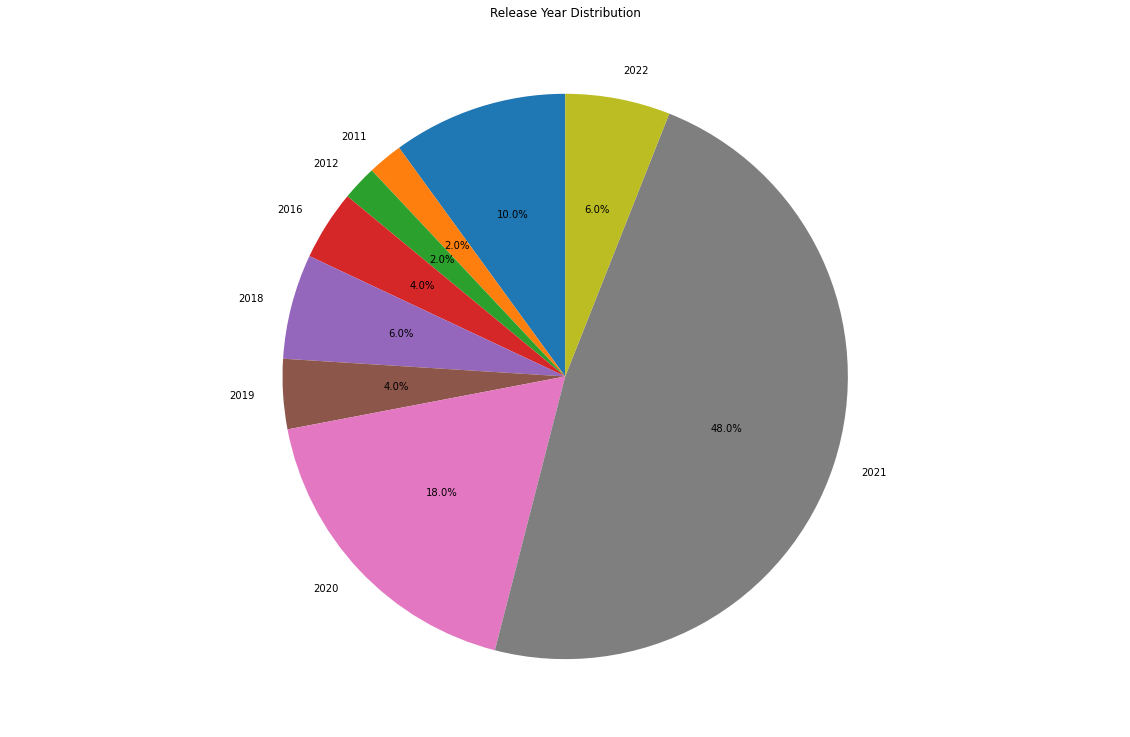

In [56]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import re
from matplotlib import pyplot as plt 

# change the release time to standard form for future analysis
# 28 Sep, 2021 => 2021-09-28, NaN => None
games_info["releaseTime"] = games_info["releaseTime"].astype('datetime64[ns]').replace({np.nan:None})
games_info['Year'] = games_info['releaseTime'].apply(lambda x: "%d" % (x.year) if x != None else " ") 
   
plt.figure(figsize=(20,13))

sums = games_info.groupby(games_info["Year"])["Year"].count()
axis('equal');
plt.pie(sums,autopct='%1.1f%%', labels=sums.index, labeldistance = 1.1, shadow = False, startangle = 90, pctdistance = 0.6);
plt.title('Release Year Distribution')
plt.show()



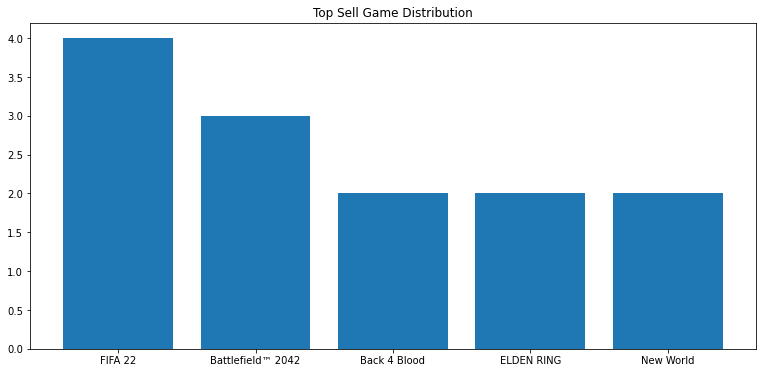

In [64]:
# look for the game name counting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
dirts = {} # actor's names and the number of movie they acted
for gameName in games_info['gameName']:
    dirts[gameName] = dirts.get(gameName,0) + 1

top_dirts = {}
for i in sorted(dirts.items(), key=lambda x:x[1], reverse=True):
    if i[1] > 1: 
        top_dirts[i[0]] = i[1]

plt.figure(figsize=(13,6))
plt.bar(*zip(*top_dirts.items()))
plt.title('Top Sell Game Distribution')
plt.show()


In [212]:
# # look for the game price counting
games_info['newPrice'] = games_info['price'].apply(lambda x: x[-5:].replace("$", ""))
# games_info['newPrice']
games_info[['gameName', 'newPrice']].head(10)
# ax = games_info.plot(kind='scatter', y='newPrice', x='gameName', title="Top Sell Game Price")


,gameName,newPrice
22,Destiny 2: Beyond Light Deluxe Edition,94.49
24,Atelier Ryza: Ever Darkness & the Secret Hideout,89.20
27,NARUTO SHIPPUDEN: Ultimate Ninja STORM Legacy,87.83
28,DEATHLOOP,87.00
25,Need for Speed™ Heat,84.90
20,Age of Empires IV,79.90
31,ELDEN RING,79.90
5,Halo Infinite (Campaign),79.90
7,Forza Horizon 5,79.90
34,Tales of Arise,79.90


In [159]:
gameDetailFromURL = pd.read_csv('gameDetailFromURL.csv')
gameDetailFromURL.head(20)

,gameName,developer,gameType,gameDescription
0,['Back 4 Blood'],Turtle Rock Studios,"['Zombies', 'Action', 'Online Co-Op', 'Multipl...",Back 4 Blood is a thrilling cooperative first-...
1,['FIFA 22'],EA Canada,"['Soccer', 'Sports', 'Competitive', 'Simulatio...","Play FIFA 22, Get a Next Generation Player Ite..."
2,['FIFA 22'],EA Canada,"['Soccer', 'Sports', 'Competitive', 'Simulatio...","Play FIFA 22, Get a Next Generation Player Ite..."
3,['Battlefield™ 2042'],DICE,"['Shooter', 'Action', 'Multiplayer', 'FPS', 'F...",Battlefield™ 2042 is a first-person shooter th...
4,[' '],,[],
5,[' '],,"['Action', 'Adventure', 'Shooter', 'FPS', 'Lor...",
6,['Football Manager 2022'],Sports Interactive,"['Sports', 'Management', 'Real Time Tactics', ...",The closest thing to real football management....
7,['Forza Horizon 5'],Playground Games,"['Racing', 'Open World', 'Adventure', 'Driving...",Your Ultimate Horizon Adventure awaits! Explor...
8,['Back 4 Blood'],Turtle Rock Studios,"['Zombies', 'Action', 'Online Co-Op', 'Multipl...",Back 4 Blood is a thrilling cooperative first-...
9,['Myth of Empires'],Angela Game,"['Early Access', 'Open World Survival Craft', ...",Myth of Empires is a multiplayer sandbox game....


In [ ]:
# count developer 
top_developer_name = top_developer.keys()
movies = {}
for i in range(len(movies_info)):
    acts = movies_info['actorNamesList'][i]
    for j in literal_eval(acts):
        if j in list(top_acts_name):
            movies.setdefault(j,[]).append(movies_info['movieTitle'][i])

for i in sorted(movies, key=lambda x:len(movies[x]), reverse=True):
    print(f'{i}: {movies[i]}')

In [206]:
# count all the game types by orders
import matplotlib.pyplot as plt
import re
game_types = gameDetailFromURL['gameType']
elements_count = {}
typeList = list()
# game_type_rank = {}
# game_type_fq = {}
for i in range(len(gameDetailFromURL)):
    game_type = gameDetailFromURL['gameType'][i]
    new_game_type = game_type.replace("[","").replace("]","").replace("'","").split(",")
    for element in new_game_type:
#         print(element)
        # checking whether it is in the dict or not
        if element in elements_count:
            # incerementing the count by 1
            elements_count[element] += 1
        else:
            # setting the count to 1
            elements_count[element] = 1

for key, value in elements_count.items():
    typeList.append( (value, key) )
typeList.sort(reverse=True)
for val, key in typeList : 
    print (key, val)  
        




 Multiplayer 32
 Singleplayer 31
 Adventure 26
 Action 26
 Co-op 22
 Online Co-Op 20
 PvP 19
 Open World 18
 First-Person 15
 Simulation 13
 Atmospheric 13
 Violent 10
 Third Person 10
 Realistic 10
 Team-Based 9
 Shooter 9
 RPG 9
 Fantasy 9
 9
 Sexual Content 8
 Sandbox 8
 Physics 8
 Indie 8
 Cinematic 8
 Character Customization 8
 3D 8
 eSports 7
 War 7
 Survival 7
 Strategy 7
 Story Rich 7
 Sports 7
 FPS 7
 Crafting 7
 MMORPG 6
 Local Multiplayer 6
 Immersive Sim 6
 Gore 6
 Exploration 6
 Difficult 6
 Controller 6
 Roguelite 5
 Replay Value 5
 PvE 5
 Open World Survival Craft 5
 Military 5
 Local Co-Op 5
 Horror 5
 Great Soundtrack 5
 Football 5
 Family Friendly 5
 Competitive 5
 Building 5
Soccer 4
FPS 4
 Walking Simulator 4
 Tactical 4
 Survival Horror 4
 Souls-like 4
 Sci-fi 4
 JRPG 4
 Early Access 4
 Destruction 4
 Combat 4
 Action RPG 4
 2D 4
Shooter 3
Racing 3
RPG 3
Massively Multiplayer 3
Action 3
 Vehicular Combat 3
 VR 3
 Split Screen 3
 Resource Management 3
 Psychological

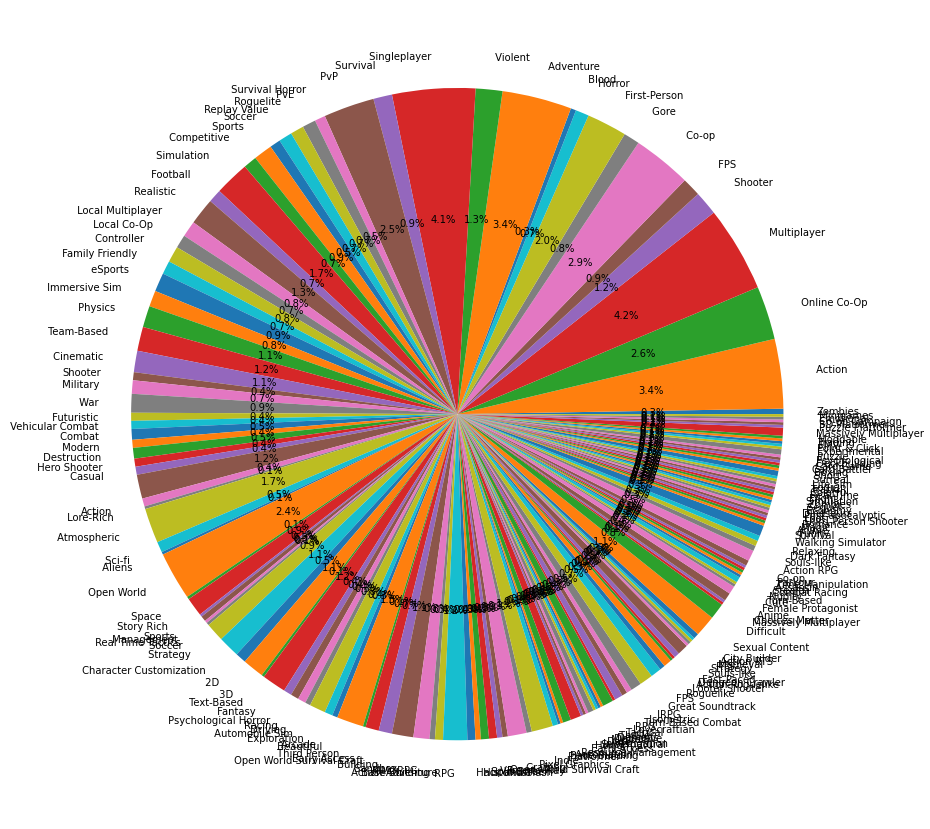

In [208]:
fig = plt.figure(figsize=(20,15))
plt.pie(elements_count.values(), labels=elements_count.keys(),autopct='%1.1f%%')

plt.show()

In [67]:
game_review = pd.read_csv('review_Details.csv')
game_review.head()

,gameTitle,Reviews,Rate
0,Back 4 Blood,Posted: 25 October\r\n\t\t\t\t\t\t\t\t\t\t\t\t...,Recommended
1,Back 4 Blood,Posted: 18 October\r\n\t\t\t\t\t\t\t\t\t\t\t\t...,Recommended
2,Back 4 Blood,Posted: 16 October\r\n\t\t\t\t\t\t\t\t\t\t\t\t...,Recommended
3,Back 4 Blood,Posted: 30 October\r\n\t\t\t\t\t\t\t\t\t\t\t\t...,Not Recommended
4,Back 4 Blood,Posted: 12 October\r\n\t\t\t\t\t\t\t\t\t\t\t\t...,Not Recommended


In [86]:
import re
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(label):
    reviews = game_review[game_review['Rate'] == label].Reviews
    token = []
    for review in reviews:
        tokens = word_tokenize(str(review))
        token.extend(tokens)
    pos_tags = nltk.pos_tag(token,tagset='universal')

    adj_words = [word for word,tag in pos_tags if tag=='ADJ']
    adj_words = ' '.join(adj_words)
    wordcloud = WordCloud(width = 800,
                         height = 600,
                         margin = 2,
                         background_color = 'white',
                         ).generate(adj_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


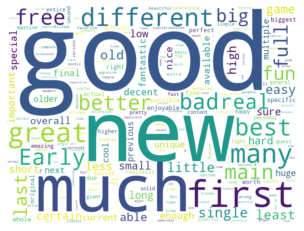

In [87]:
show_wordcloud("Recommended")

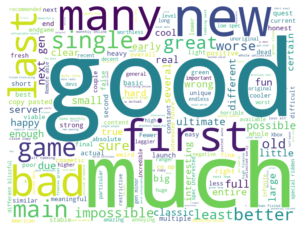

In [88]:
show_wordcloud("Not Recommended")